In [4]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

xtrain = tf.keras.utils.normalize(xtrain, axis=1)
xtest = tf.keras.utils.normalize(xtest, axis=1)

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4665 - accuracy: 0.8688
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1070 - accuracy: 0.9677
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0754 - accuracy: 0.9772


In [6]:
val_loss = val_acc = model.evaluate(xtest, ytest)
print(val_loss, val_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0937 - accuracy: 0.9716
[0.09365326166152954, 0.9715999960899353] [0.09365326166152954, 0.9715999960899353]


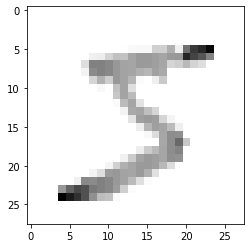

In [7]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0], cmap= plt.cm.binary)
plt.show()

In [8]:
model.save('epic_name_reader.model')

INFO:tensorflow:Assets written to: epic_name_reader.model\assets


In [9]:
new_model = tf.keras.models.load_model('epic_name_reader.model')

In [10]:
predictions = new_model.predict([xtest])

In [11]:
print(predictions)

[[1.9270516e-09 1.7208153e-08 4.7061908e-06 ... 9.9911672e-01
  2.2728923e-07 3.1869368e-07]
 [2.2841939e-09 8.7354472e-04 9.9912149e-01 ... 7.2976668e-08
  1.1117689e-06 2.4879948e-10]
 [5.2247188e-08 9.9987876e-01 2.1418567e-05 ... 2.6497963e-05
  4.5408931e-05 6.4884819e-07]
 ...
 [1.0855991e-10 2.1898327e-07 1.2744100e-09 ... 4.0016703e-06
  1.7871625e-06 1.0914261e-04]
 [5.7489638e-07 1.3761100e-07 5.0535522e-09 ... 2.6819118e-08
  2.0449780e-04 3.5429317e-09]
 [1.8014474e-05 1.4748295e-08 2.4224784e-07 ... 5.8676275e-10
  3.3652500e-06 3.5435782e-08]]


In [16]:
import numpy as np


4


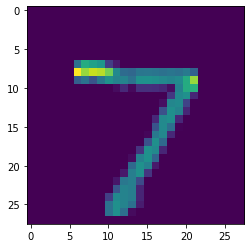

7


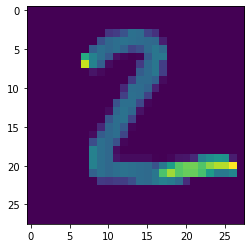

2


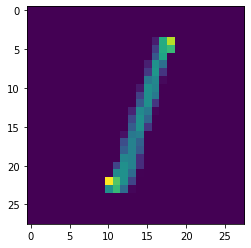

1


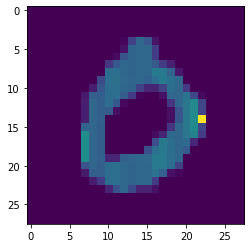

0


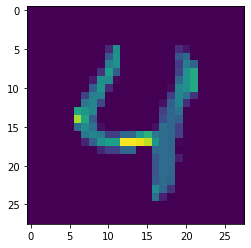

4


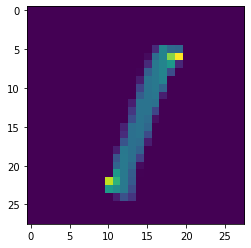

1


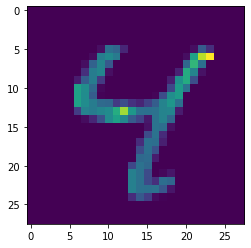

4


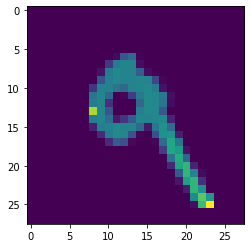

9


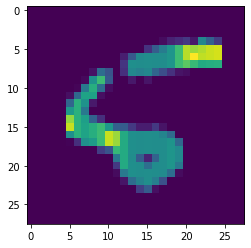

5


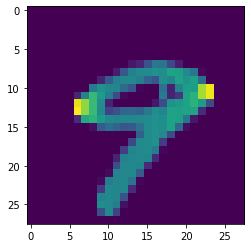

9


In [20]:
index = 0
for img in xtest[0:10]:
    plt.imshow(img)
    plt.show()
    print(np.argmax(predictions[index]))
    index += 1